In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd, MonthBegin
from dateutil.relativedelta import relativedelta
from datetime import timedelta

### Загрузка и ознакомление с данными

In [194]:
#  таблица с уникальными идентификаторами пользователей: 'olist_customers_dataset.csv'

# customer_id — позаказный идентификатор пользователя
# customer_unique_id —  уникальный идентификатор пользователя  
# (в идеальных данных не может быть двух пользователей с одинаковым значением, является уникальным айдишником пользователя)

# customer_zip_code_prefix —  почтовый индекс пользователя
# customer_city —  город доставки пользователя
# customer_state —  штат доставки пользователя

In [195]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [196]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [197]:
# таблица заказов: 'olist_orders_dataset.csv'

# order_id —  уникальный идентификатор заказа (номер чека)
# customer_id —  позаказный идентификатор пользователя
# order_status —  статус заказа
# order_purchase_timestamp —  время создания заказа
# order_approved_at —  время подтверждения оплаты заказа
# order_delivered_carrier_date —  время передачи заказа в логистическую службу
# order_delivered_customer_date —  время доставки заказа
# order_estimated_delivery_date —  обещанная дата доставки

In [198]:
parse_dates = ['order_purchase_timestamp', 
               'order_approved_at', 
               'order_delivered_carrier_date',
               'order_delivered_customer_date',
               'order_estimated_delivery_date']

orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=parse_dates)
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [199]:
# Уникальные статусы заказов в таблице olist_orders_dataset, столбец order_status:

# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт
# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

In [200]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [201]:
#  товарные позиции, входящие в заказы: 'olist_order_items_dataset.csv'

# order_id —  уникальный идентификатор заказа (номер чека)
# order_item_id —  идентификатор товара внутри одного заказа (не содержит информацию о количестве товаров)
# product_id —  уникальный идентефикатор товара (аналог штрихкода)
# seller_id — уникальный идентефикатор производителя товара
# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
# price —  цена за единицу товара
# freight_value —  вес товара

In [202]:
items = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [203]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


просматриваю связку данных через order_id

In [204]:
orders[orders.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36265,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06


In [205]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [206]:
items[items.order_id == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


## <ins>Решаю задачи</ins>
1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

In [207]:
orders_with_customer_unique_id = orders.merge(customers[['customer_id','customer_unique_id']], on='customer_id')
orders_with_customer_unique_id.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8


In [208]:
orders_with_customer_unique_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 7.6+ MB


<font size="4">
    <ins>За покупку будем считать заказ (без учета кол-ва и наименования товара) <b>с order_status == 'delivered'</b>  и с учетом того, что проведена оплата <b>order_approved_at == non-null</b>.
    </ins>
</font>

Основание - юридическое толкование того что является куплей-продажей:

<i>Договор купли-продажи — это соглашение, по которому одна сторона (продавец) обязуется передать вещь (товар) в собственность другой стороне (покупателю), а покупатель обязуется принять этот товар и уплатить за него определенную денежную сумму (цену) (п. 1 ст. 454 ГК РФ).</i>

<i>Договор розничной купли-продажи считается исполненным с момента вручения товара покупателю, а при его отсутствии любому лицу, предъявившему квитанцию или иной документ, свидетельствующий о заключении договора или об оформлении доставки товара, если иное не предусмотрено законом, иными правовыми актами или договором либо не вытекает из существа обязательства. (п. 2 ст. 499 ГК РФ)</i>

In [209]:
total_sell = orders_with_customer_unique_id.query('order_status == "delivered" & order_approved_at.notnull()')

Отcортировав только завершенные покупки, можно посчитать пользователей которые совершили всего одну покупку.

### Ответ:

In [210]:
(total_sell.groupby('customer_unique_id', as_index=False)['order_id'].count().order_id == 1).sum()

90545

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (10 баллов)

In [211]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


<font size="4">
    <ins>
        Причинами будем считать <b>order_status == 'canceled'</b> и <b>order_status == 'unavailable'</b>.
    </ins>
    заказ отменен и заказ недоступен.
    <ins>
        За основу берем необработанную таблицу заказов <b>(orders)</b>.
    </ins>
</font>


для этого преобразуем колонку с размещением заказа в формат даты начала месяца, когда был размещен заказ. Так сможем посчитать сколько в каждом месяце было отмененных и недоступных заказов. После чего высчитаем среднемесячный показатель по каждой причине

In [212]:
not_delivered = orders.query('order_status == "canceled" | order_status == "unavailable"')[['order_status', 'order_purchase_timestamp']]


In [213]:
not_delivered

,order_status,order_purchase_timestamp
266,unavailable,2017-11-16 15:09:28
397,canceled,2018-08-04 14:29:27
586,unavailable,2018-01-31 11:31:37
613,canceled,2018-01-26 21:34:08
687,unavailable,2017-08-14 17:38:02
...,...,...
99252,unavailable,2018-01-16 14:27:59
99283,canceled,2018-08-31 16:13:44
99347,canceled,2018-09-06 18:45:47
99348,unavailable,2017-08-23 16:28:04


In [214]:
not_delivered['order_purchase_timestamp'] = not_delivered.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m-01'))

In [215]:
not_delivered

,order_status,order_purchase_timestamp
266,unavailable,2017-11-01
397,canceled,2018-08-01
586,unavailable,2018-01-01
613,canceled,2018-01-01
687,unavailable,2017-08-01
...,...,...
99252,unavailable,2018-01-01
99283,canceled,2018-08-01
99347,canceled,2018-09-01
99348,unavailable,2017-08-01


In [216]:
not_delivered.groupby(['order_status', 'order_purchase_timestamp'], as_index=False).size().head(10)

,order_status,order_purchase_timestamp,size
0,canceled,2016-09-01,2
1,canceled,2016-10-01,24
2,canceled,2017-01-01,3
3,canceled,2017-02-01,17
4,canceled,2017-03-01,33
5,canceled,2017-04-01,18
6,canceled,2017-05-01,29
7,canceled,2017-06-01,16
8,canceled,2017-07-01,28
9,canceled,2017-08-01,27


Среднее по причинам
### Ответ:

In [217]:
not_delivered.groupby(['order_status', 'order_purchase_timestamp'], as_index=False).size() \
    .groupby('order_status', as_index=False).agg({'size' : 'mean'}).rename(columns={"size": "mean"}).round(2)

,order_status,mean
0,canceled,26.04
1,unavailable,29.00


### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (7 баллов)

<font size="4">
Задачу можно трактовать по разному: если имееются ввиду покупки, то возможно следует использовать данные для первого задания, где были отфильтрованы только завершенные покупки. Но бизнес скорее интересует в какой день делались именно заказы <b>order_purchase_timestamp</b>, поэтому за основу возьмем таблицу <b>orders</b> в "чистом виде".
</font>


In [218]:
orders_by_product_id = orders.merge(items[['order_id','product_id']], how='left', on='order_id')

In [219]:
orders_by_product_id.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,87285b34884572647811a353c7ac498a
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,595fac2a385ac33a80bd5114aec74eb8
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,aa4383b373c6aca5d8797843e5594415
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,d0b61bfb1de832b15ba9d266ca96e5b0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,65266b2da20d04dbe00c5c2d3bb7859e


In [220]:
purchase_and_product_id =  orders_by_product_id[['order_purchase_timestamp', 'product_id']]

In [221]:
purchase_and_product_id['order_purchase_timestamp'] = purchase_and_product_id.order_purchase_timestamp.dt.day_name()
purchase_and_product_id.head(3)

C:\Users\Администратор\AppData\Local\Temp\ipykernel_21224\2003030298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_and_product_id['order_purchase_timestamp'] = purchase_and_product_id.order_purchase_timestamp.dt.day_name()


,order_purchase_timestamp,product_id
0,Monday,87285b34884572647811a353c7ac498a
1,Tuesday,595fac2a385ac33a80bd5114aec74eb8
2,Wednesday,aa4383b373c6aca5d8797843e5594415


### считаем число заказов каждого товара в определенный день недели

In [222]:
# здесь просто хочу проранжировать товар, чтобы в будущем проверить остались ли в финальном ответе только все максимумы

purchase_and_product_id.groupby(['order_purchase_timestamp', 'product_id'], as_index=False).size() \
     .sort_values(by=['product_id', 'size', 'order_purchase_timestamp']).head(10)

,order_purchase_timestamp,product_id,size
25606,Sunday,00066f42aeeb9f3007548bb9d3f33c38,1
42277,Tuesday,00088930e925c41fd95ebfe695fd2655,1
33324,Thursday,0009406fd7479715e4bef61dd91f2462,1
0,Friday,000b8f95fcb9e0096488278317764d19,1
51763,Wednesday,000b8f95fcb9e0096488278317764d19,1
42278,Tuesday,000d9be29b5207b54e86aa1b1ac54872,1
33325,Thursday,0011c512eb256aa0dbbb544d8dffcf6e,1
25607,Sunday,00126f27c813603687e6ce486d909d01,2
33326,Thursday,001795ec6f1b187d37335e1c4704762e,1
51764,Wednesday,001795ec6f1b187d37335e1c4704762e,1


In [223]:
size_purchase_and_product_id = purchase_and_product_id.groupby(['order_purchase_timestamp', 'product_id'], as_index=False).size()

### считаем максимум числа заказов каждого товара в определенный день недели

In [224]:
max_purchase_by_product_id = purchase_and_product_id.groupby(['order_purchase_timestamp', 'product_id'], as_index=False) \
    .size().groupby('product_id', as_index=False)['size'].max()

max_purchase_by_product_id

,product_id,size
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,1
32947,fff81cc3158d2725c0655ab9ba0f712c,1
32948,fff9553ac224cec9d15d49f5a263411f,1
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,2


Через merge собираем таблицу, где будут только дни недели, где были максимальные заказы. Если макс был достигнут в несколько дней недели, то в таблице останутся эти несколько дней. 

Очень много товаров с максимумом всего в 1 заказ. Возможно их разумно отбросить (при желании это теперь легко сделать, см 2 вариант ответа), но такой задачи не стояло, поэтому оставил все данные в варианте 1

### Ответ. Вариант 1 - все данные

In [225]:
max_purchase_by_product_id.merge(size_purchase_and_product_id, on=['product_id', 'size']) \
    .rename(columns={'order_purchase_timestamp' : 'day_of_week', 'size' : 'quantity'})

,product_id,quantity,day_of_week
0,00066f42aeeb9f3007548bb9d3f33c38,1,Sunday
1,00088930e925c41fd95ebfe695fd2655,1,Tuesday
2,0009406fd7479715e4bef61dd91f2462,1,Thursday
3,000b8f95fcb9e0096488278317764d19,1,Friday
4,000b8f95fcb9e0096488278317764d19,1,Wednesday
...,...,...,...
42700,fff6177642830a9a94a0f2cba5e476d1,1,Sunday
42701,fff81cc3158d2725c0655ab9ba0f712c,1,Monday
42702,fff9553ac224cec9d15d49f5a263411f,1,Friday
42703,fffdb2d0ec8d6a61f0a0a0db3f25b441,2,Tuesday


### Ответ. Вариант 2 (quantity > 1)

In [226]:
max_purchase_by_product_id.merge(size_purchase_and_product_id, on=['product_id', 'size']) \
    .rename(columns={'order_purchase_timestamp' : 'day_of_week', 'size' : 'quantity'}) \
    .query("quantity > 1")

,product_id,quantity,day_of_week
7,00126f27c813603687e6ce486d909d01,2,Sunday
8,001795ec6f1b187d37335e1c4704762e,3,Saturday
10,001b72dfd63e9833e8c02742adf472e3,5,Wednesday
12,00210e41887c2a8ef9f791ebc780cc36,3,Thursday
13,002159fe700ed3521f46cfcf6e941c76,2,Saturday
...,...,...,...
42692,ffedbd68fa6f44e788ff6c2db8094715,3,Tuesday
42693,ffef256879dbadcab7e77950f4f4a195,2,Monday
42694,ffef256879dbadcab7e77950f4f4a195,2,Tuesday
42695,fff0a542c3c62682f23305214eaeaa24,4,Tuesday


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

Если нас интересуют именно покупки, то за основу возьмем таблицу из первого ответа, где мы определялись с тем что такое покупка (оплаченный и доставленный заказ)


In [227]:
total_sell.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6


Дату покупки считаем от столбца order_approved_at, приведем ее к началу месяца, для дальнейшей группировки и подсчета заказов по месяцам:

In [228]:
total_sell['month_of_approved'] = (total_sell.order_approved_at + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin()).dt.date

C:\Users\Администратор\AppData\Local\Temp\ipykernel_21224\2015999861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sell['month_of_approved'] = (total_sell.order_approved_at + pd.offsets.MonthEnd(0) - pd.offsets.MonthBegin()).dt.date


In [229]:
count_of_purchases = total_sell.groupby(['customer_unique_id', 'month_of_approved'], as_index=False)['order_id'].count() \
    .rename(columns={"order_id": "count_of_purchases"})

In [230]:
count_of_purchases['month_of_approved'] = pd.to_datetime(count_of_purchases["month_of_approved"])

Вытаскиваем кол-во дней в месяце за счет MonthEnd и использования срезов:

In [231]:
count_of_purchases['week_in_month'] = (count_of_purchases.month_of_approved + MonthEnd(1)) \
    .apply(lambda x: str(x)[8:10]).astype(int)/7

count_of_purchases.head(5)

,customer_unique_id,month_of_approved,count_of_purchases,week_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714


In [232]:
count_of_purchases["avg_weekly_by_month"] = round(count_of_purchases.count_of_purchases / count_of_purchases.week_in_month, 2)

### Ответ содержится в столбце: avg_weekly_by_month.

In [233]:
count_of_purchases


,customer_unique_id,month_of_approved,count_of_purchases,week_in_month,avg_weekly_by_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,4.428571,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,4.428571,0.23
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,4.428571,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,4.428571,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,4.285714,0.23
...,...,...,...,...,...
95171,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,4.285714,0.23
95172,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,4.428571,0.23
95173,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,4.000000,0.25
95174,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,4.428571,0.23


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. (15 баллов)

за основу берем все ту же таблицу с покупками

In [234]:
total_sell.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96464 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96464 non-null  object        
 1   customer_id                    96464 non-null  object        
 2   order_status                   96464 non-null  object        
 3   order_purchase_timestamp       96464 non-null  datetime64[ns]
 4   order_approved_at              96464 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96462 non-null  datetime64[ns]
 6   order_delivered_customer_date  96456 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96464 non-null  datetime64[ns]
 8   customer_unique_id             96464 non-null  object        
 9   month_of_approved              96464 non-null  object        
dtypes: datetime64[ns](5), object(5)
memory usage: 8.1+ MB


In [235]:
total_sell['month_of_approved'] = pd.to_datetime(total_sell.month_of_approved)
total_sell

C:\Users\Администратор\AppData\Local\Temp\ipykernel_21224\2889327716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sell['month_of_approved'] = pd.to_datetime(total_sell.month_of_approved)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,month_of_approved
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,2018-02-01
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,2017-08-01
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,2018-01-01


создаем когорты - первый месяц покупки у каждого пользователя

In [236]:
cohort = total_sell.groupby('customer_unique_id', as_index=False)['month_of_approved'].min()
cohort

,customer_unique_id,month_of_approved
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01
2,0000f46a3911fa3c0805444483337064,2017-03-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01
...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01
93341,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01
93342,ffff371b4d645b6ecea244b27531430a,2017-02-01
93343,ffff5962728ec6157033ef9805bacc48,2018-05-01


добавляем столбец с 3 месяцем на основе когорт

In [237]:
cohort['third_month'] = cohort.month_of_approved + pd.DateOffset(months=3)
cohort

,customer_unique_id,month_of_approved,third_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,2018-08-01
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,2018-01-01
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,2018-02-01
...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,2017-09-01
93341,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,2018-03-01
93342,ffff371b4d645b6ecea244b27531430a,2017-02-01,2017-05-01
93343,ffff5962728ec6157033ef9805bacc48,2018-05-01,2018-08-01


создаем таблицу, где оставляем только пользователей у которых была хотябы одна покупка в определенном месяце. Важно чтобы пользователи не задублировались при последующем мердже! 

In [238]:
uniq_purchases_by_month = total_sell[['month_of_approved', 'customer_unique_id']].drop_duplicates()
uniq_purchases_by_month.head()

,month_of_approved,customer_unique_id
0,2017-10-01,7c396fd4830fd04220f754e42b4e5bff
1,2018-07-01,af07308b275d755c9edb36a90c618231
2,2018-08-01,3a653a41f6f9fc3d2a113cf8398680e8
3,2017-11-01,7c142cf63193a1473d2e66489a9ae977
4,2018-02-01,72632f0f9dd73dfee390c9b22eb56dd6


за счет объединения таблиц подтягиваются соответствия покупок на 3 месяц. Если конкретный клиент в когорте совершил покупку на третий месяц, то подтянется дата покупки

In [239]:
table = cohort.merge(uniq_purchases_by_month, left_on=['customer_unique_id', 'third_month'],
            right_on=['customer_unique_id', 'month_of_approved'], how='left')

table.head()

,customer_unique_id,month_of_approved_x,third_month,month_of_approved_y
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,2018-08-01,NaT
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,2018-08-01,NaT
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-06-01,NaT
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,2018-01-01,NaT
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,2018-02-01,NaT


считаем состав когорт и кол-во удержанных клиентов через 3 месяца. расчитываем retention в процентах

In [240]:
table = table.groupby('month_of_approved_x', as_index=False) \
    .agg({'customer_unique_id' : 'count', 'month_of_approved_y' : 'count'}) \
    .rename(columns={'month_of_approved_x' : 'cohort',
                    'customer_unique_id' : 'new_customer',
                    'month_of_approved_y' : 'purchase_after_three_months'})

In [241]:
table['retention_3m_%'] = round(table.purchase_after_three_months / table.new_customer * 100, 2)
table.head()

,cohort,new_customer,purchase_after_three_months,retention_3m_%
0,2016-09-01,1,0,0.00
1,2016-10-01,262,0,0.00
2,2016-12-01,1,0,0.00
3,2017-01-01,683,1,0.15
4,2017-02-01,1612,3,0.19


в задании было сказано, что надо выявить когорту с самым высоким retention с января по декабрь. Так как год не указан, посмотрим за весь период

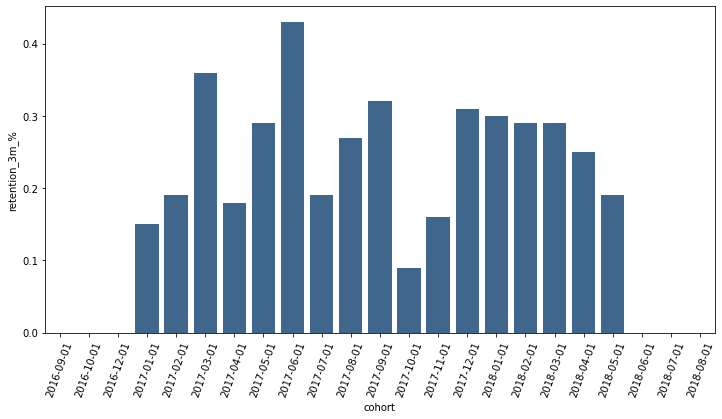

In [242]:

fig, ax = plt.subplots(figsize = (12,6)) 
sns.barplot(x=table.cohort.dt.strftime('%Y-%m-%d'), y='retention_3m_%', data=table, color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(rotation=70)
plt.show() 

### Ответ:  
максимальный показатель приходится только на один месяц. Поэтому смело берем эту дату для ответа. когорта с наивысшим retention - группа пользователей пришедшие в июне 2017г

In [243]:
table.set_index('cohort')['retention_3m_%'].idxmax()

Timestamp('2017-06-01 00:00:00')

### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики:
- R - время от последней покупки пользователя до текущей даты,  
- F - суммарное количество покупок у пользователя за всё время, 
- M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. 

Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров (23 балла)

за основу для сегментации возьмем таблицу с покупками, по определению из решения задачи 1 и добавим данные о конкретных покупках для расчета monetry

In [244]:
temp = total_sell.merge(items[['order_id', 'order_item_id','product_id', 'price']], how='left', on='order_id')
temp.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,month_of_approved,order_item_id,product_id,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10-01,1,87285b34884572647811a353c7ac498a,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90


сформируем таблицу для последующего расчета показателей

In [245]:
temp = temp.groupby(['customer_unique_id', 'order_id', 'order_approved_at'], as_index=False)['price'].sum()
temp.head()

,customer_unique_id,order_id,order_approved_at,price
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,18.90
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,25.99
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,180.00


определим контрольную дату проверки, для расчета recency

In [246]:
NOW = temp['order_approved_at'].max() + timedelta(days=1)
NOW

Timestamp('2018-08-30 15:10:26')

период для расчета rfm возьмем - за все время совершения покупок. Тк. данных мало и покупки достаточно редкие

In [247]:
temp['days_since_order'] = temp['order_approved_at'].apply(lambda x: (NOW - x).days)
temp.head()

,customer_unique_id,order_id,order_approved_at,price,days_since_order
0,0000366f3b9a7992bf8c76cfdf3221e2,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 11:11:18,129.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 18:25:44,18.90,114
2,0000f46a3911fa3c0805444483337064,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:49:17,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,d957021f1127559cd947b62533f484f7,2017-11-14 20:06:52,180.00,288


посчитаем все необходимые показатели:
* кол-во дней с момента последней покупки
* кол-во покупок
* сумма покупок

In [248]:
aggr = {
    'days_since_order': 'min',  # the number of days since last order (Recency)
    'order_approved_at': 'count', # the total number of orders in the last period (Frequency)
    'price' : 'sum'
}
rfm = temp.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 'order_approved_at': 'Frequency', 'price' : 'Monetary'}, inplace=True)
rfm.head(5)

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


определимся с ранжированием

array([[<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'Monetary'}>, <AxesSubplot:>]],
      dtype=object)

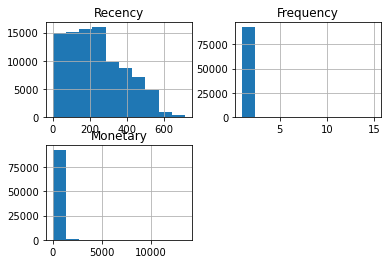

In [249]:
rfm[['Recency', 'Frequency', 'Monetary']].hist()

т.к. различия значений по F (особенно!) и M не значительны, достаточно будет проранжировать эти показатели с 1-2 для каждого клиента

In [250]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.50]).to_dict()
quintiles

{'Recency': {0.5: 219.0}, 'Frequency': {0.5: 1.0}, 'Monetary': {0.5: 89.76}}

In [251]:
def r_score(x):
    if x <= quintiles['Recency'][.5]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.5]:
        return 1
    else:
        return 2    

In [252]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [253]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,2,1,2,212
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,2,112


## клиентов разделил по частоте и давности следующим образом:




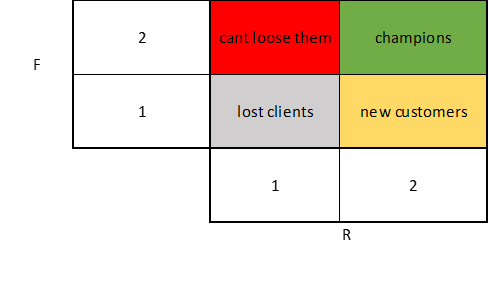

In [254]:
segt_map = {
    r'11': 'lost clients',
    r'12': 'cant loose them',
    r'21': 'new customers',
    r'22': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,2,1,2,212,new customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,2,1,1,211,new customers
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,1,111,lost clients
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,1,1,1,111,lost clients
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,1,1,2,112,lost clients


построим график распределения M для оценки RF

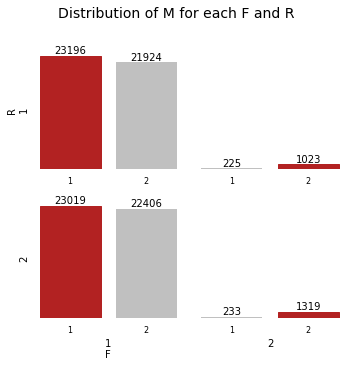

In [255]:
fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=False, sharey=True,
                         figsize=(5, 5))

r_range = range(1, 3)
f_range = range(1, 3)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 2:
            if f == 1:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 1:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14, verticalalignment='baseline')
plt.tight_layout()
plt.show()

Данный анализ не совсем подходит для такого типа структуры продаж (в основном одноразовые покупки)